In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


ModuleNotFoundError: No module named 'pandas'

In [3]:
%pip install install graphviz

  Using cached install-1.3.5-py3-none-any.whl (3.2 kB)
     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [34]:
columns=['user_id','item_id','rating','timestamp']
df=pd.read_csv('u.data',sep='\t',names=columns)

In [42]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [56]:
rating=pd.read_csv('u.item',sep='\*',header=None)

C:\Users\SIDDH\AppData\Local\Temp\ipykernel_19304\2199186511.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  rating=pd.read_csv('u.item',sep='\*',header=None)


In [57]:
titles=rating[[0,1]]

In [58]:
titles.columns=['item_id','title']

In [59]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [60]:
for item in titles["item_id"]:
    item=int(item)

In [66]:
df1=pd.merge(df,titles,on="item_id")

In [67]:
df1.tail()

,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


Exploratory DATA ANALYSIS

In [68]:
df1.groupby('title').mean()['rating'].sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [69]:
df1.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
� k�ldum klaka (Cold Fever) (1994)      1
Name: rating, Length: 1664, dtype: int64

In [75]:
record=pd.DataFrame(df1.groupby('title').mean()['rating'])

In [76]:
record['num of ratings']=df1.groupby('title').count()['rating']

In [77]:
record.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


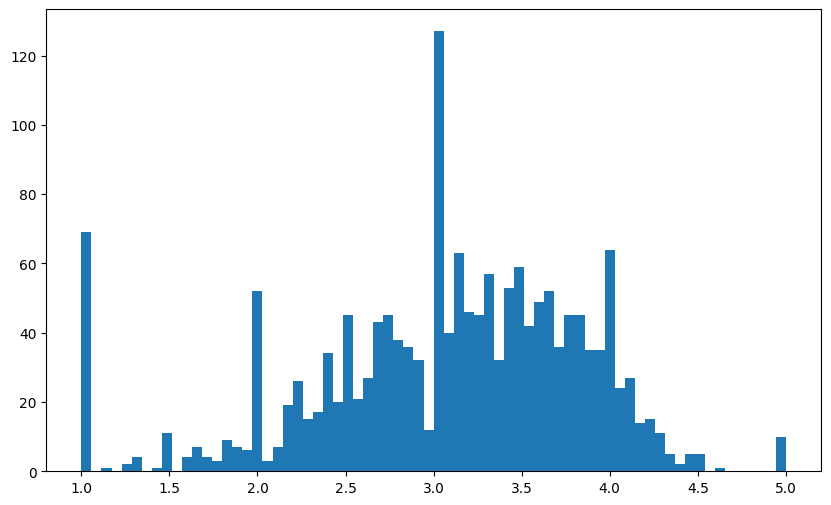

In [81]:
plt.figure(figsize=(10,6))
plt.hist(record['rating'],bins=70)
plt.show()

In [84]:
df2=df1.pivot_table(index='user_id',columns='title', values='rating')

In [109]:
def pred(mname):
    user_rate=df2[mname]
    series=df2.corrwith(user_rate)
    record['Correlation']=series

    df4=record[record['num of ratings']>100].sort_values('Correlation',ascending=False)
   
    predictions=df4.head()
    return df4

In [120]:
pred('Star Wars (1977)').head()

c:\Users\SIDDH\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\SIDDH\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,rating,num of ratings,Correlation
title,,,
Star Wars (1977),4.358491,583,1.000000
"Empire Strikes Back, The (1980)",4.204360,367,0.747981
Return of the Jedi (1983),4.007890,507,0.672556
Raiders of the Lost Ark (1981),4.252381,420,0.536117
Austin Powers: International Man of Mystery (1997),3.246154,130,0.377433
